# Crema di Mascarpone

Inspired by Pawel's blogpost [Crema di Mascarpone and Diagrammatic Reasoning](https://graphicallinearalgebra.net/2015/05/06/crema-di-mascarpone-rules-of-the-game-part-2-and-diagrammatic-reasoning/).

## A simple recipe

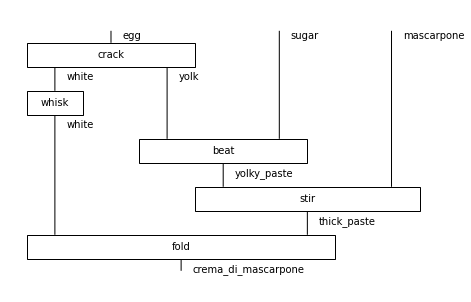

In [1]:
from discopy import Ty, Box, Id

egg, white, yolk = Ty('egg'), Ty('white'), Ty('yolk')
sugar, mascarpone = Ty('sugar'), Ty('mascarpone')
yolky_paste, thick_paste = Ty('yolky_paste'), Ty('thick_paste')
crema_di_mascarpone = Ty('crema_di_mascarpone')

crack = Box('crack', egg, white @ yolk)
beat = Box('beat', yolk @ sugar, yolky_paste)
whisk = Box('whisk', white, white)
stir = Box('stir', yolky_paste @ mascarpone, thick_paste)
fold = Box('fold', white @ thick_paste, crema_di_mascarpone)


recipe = crack @ Id(sugar @ mascarpone)\
    >> whisk @ beat @ Id(mascarpone)\
    >> Id(white) @ stir\
    >> fold

recipe.draw(aspect='auto')

## Cracking two eggs with a swap

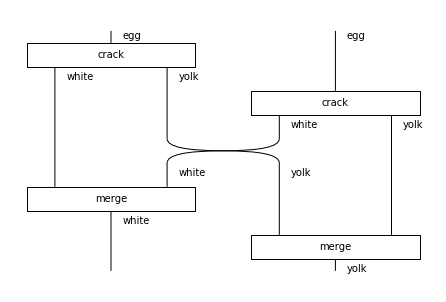

In [2]:
from discopy import Swap

merge = lambda x: Box('merge', x @ x, x)

crack_two_eggs = crack @ crack\
    >> Id(white) @ Swap(yolk, white) @ Id(yolk)\
    >> merge(white) @ merge(yolk)

crack_two_eggs.draw()

## Applying a substitution functor

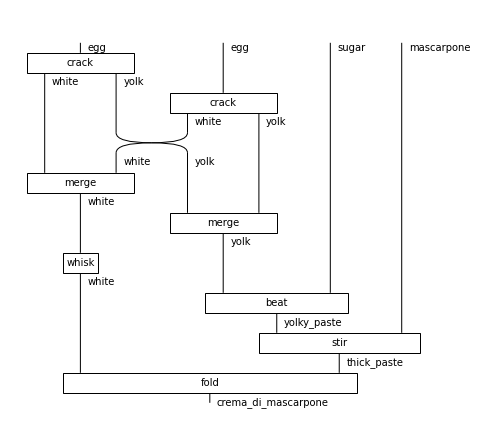

In [3]:
from discopy import Functor

ob = lambda x: egg @ egg if x == egg else x
ar = lambda f: crack_two_eggs if f == crack else f
F = Functor(ob, ar)
F(recipe).draw(aspect='auto', figsize=(6, 6))